In [211]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd 
import requests
import json
import time
from konlpy.tag import Okt
from ckonlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [212]:
driver = webdriver.Chrome("C:\\chromedriver.exe")

In [213]:
url = "http://www.chungnam.go.kr/coronaStatus.do"

In [214]:
driver.get(url)

In [215]:
bs = BeautifulSoup(driver.page_source, "html.parser") 

In [216]:
#데이터프레임 생성
columns=['환자','인적사항','감염경로','확진일','접촉자수','격리시설','이동경로']
df=pd.DataFrame(columns=columns)

In [217]:
datas=bs.find_all('td')

In [218]:
d_text=[]
for data in datas:
    d_text.append(data.get_text())

In [219]:
#def make_list(text,a_list):
n=0
환자=[]
인적사항,감염경로,확진일,접촉자수,격리시설,이동경로=[],[],[],[],[],[]

for text in d_text:
    n+=1
    if n%7==1:
        환자.append(text)
    elif n%7==2:
        인적사항.append(text)
    elif n%7==3:
        감염경로.append(text)
    elif n%7==4:
        확진일.append(text)
    elif n%7==5:
        접촉자수.append(text)
    elif n%7==6:
        격리시설.append(text)
    else :
        이동경로.append(text)
        


In [220]:
i=0
title=[환자,인적사항,감염경로,확진일,접촉자수,격리시설,이동경로]
for column in columns:
    df[column]=title[i]
    i+=1

In [221]:
HR=df['인적사항'].str.replace(',','').astype(str)

HR.dtypes

area,gender,age=[],[],[]
for hr in HR:
    hr_split=hr.split()
    area.append(hr_split[0])
    gender.append(hr_split[1])
    age.append(hr_split[2])

df['나이']=age
df['지역']=area
df['성별']=gender



In [222]:
#환자, 대분류 소분류 나누기
ID=df['환자'].str.replace(')','').astype(str)

ID.dtypes

High,Low=[],[]
for id in ID:
    id_split=id.split('(')
    High.append(id_split[0])
    Low.append(id_split[1])


df['대분류']=High
df['소분류']=Low



In [223]:
df

,환자,인적사항,감염경로,확진일,접촉자수,격리시설,이동경로,나이,지역,성별,대분류,소분류
0,충남#94(천안#86),"천안, 남, 38세",역학조사중,3월 6일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.6.(금) 발열, 상기도 ...",38세,천안,남,충남#94,천안#86
1,충남#93(천안#85),"천안, 여, 31세",역학조사중,3월 6일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.6.(금) 기침, 인후통 ...",31세,천안,여,충남#93,천안#85
2,충남#92(천안#84),"천안, 남, 69세",역학조사중,3월 6일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.2.(월) 기침, 가래 증...",69세,천안,남,충남#92,천안#84
3,충남#91(천안#83),"천안, 남, 51세",역학조사중,3월 6일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.3.(화) 발열, 인후통,...",51세,천안,남,충남#91,천안#83
4,충남#90(천안#82),"천안, 남, 52세",역학조사중,3월 5일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 2.25.(화) 기침 증상, ...",52세,천안,남,충남#90,천안#82
...,...,...,...,...,...,...,...,...,...,...,...,...
89,충남#5(천안#4),"천안(불당동), 여, 44세",역학조사중,2월 26일,9명,천안의료원,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 2.23.(일) 발열, 근육통...",44세,천안(불당동),여,충남#5,천안#4
90,충남#4(천안#3),"천안(불당동), 여, 47세",역학조사중,2월 25일,6명,단국대학병원,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 2.24.(월) 발열, 오한,...",47세,천안(불당동),여,충남#4,천안#3
91,충남#3(천안#2),"천안(두정동), 여, 50세",역학조사중,2월 25일,4명,단국대학병원,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 2.24.(월) 발열, 기침,...",50세,천안(두정동),여,충남#3,천안#2
92,충남#2(천안#1),"천안(불당동), 여, 47대",역학조사중,2월 25일,36명,단국대학병원,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 2.24.(월) 발열 증상, ...",47대,천안(불당동),여,충남#2,천안#1


In [383]:

#rout=df['이동경로'].tolist()
rout=df['이동경로'].str.replace('\t','').astype(str)
#rout=rout.str.replace('\n','').astype(str)
rout=rout.str.replace('\xa0','').astype(str)
rout=rout.str.replace('피트니스','휘트니스').astype(str)
rout=rout.str.replace('천안시','천안').astype(str)
rout=rout.str.replace('아산시','아산').astype(str)
rout=rout.str.replace('호반베르디움 센트로포레','호반베르디움센트로포레').astype(str)
rout=rout.str.replace('벽산블루밍 1차','벽산블루밍1차').astype(str)
rout=rout.str.replace('파크밸리 동일하이빌','파크밸리동일하이빌').astype(str)
rout=rout.str.replace('상쾌한 이비인후과','상쾌한이비인후과').astype(str)
rout=rout.str.replace('휘트니스 센터','휘트니스센터').astype(str)
rout_list=rout.tolist() #이동경로 데이터프레임 리스트로 변환

In [16]:
rout_list

['\n- 3.2.(월) 기침, 가래 증상, 천안의료원 선별진료소에서 검체 체취, 3.6.(금) 확진 판정\n- 역학조사 中, 충남#51번(천안#44번) 확진자 가족\n\n\n',
 '\n- 3.3.(화) 발열, 인후통, 근육통 증상, 천안서북구보건소 선별진료소에서 검체 체취, 3.6.(금) 확진 판정\n- 역학조사 中, 충남#23번(천안#20번) 확진자 가족\n\n\n',
 '\n- 2.25.(화) 기침 증상, 천안동남구보건소 선별진료소에서 검체 체취, 3.5.(목) 확진 판정\n- 역학조사 中, 충남#83번(천안#75번) 확진자 부친\n\n\n',
 '\n- 3.3.(화) 무증상, 천안서북구보건소 선별진료소에서 검체 체취, 3.5.(목) 확진 판정\n- 역학조사 中\n\n\n',
 '\n- 2.28.(금) 발열 증상, 천안서북구보건소 선별진료소에서 검체 체취, 3.5.(목) 확진 판정\n- 거주지 : 백석동 백석더샾, 천안 #76 #78 #79 확진자의 가족, 역학조사 中\n\n(2.27.목) 종 일   천안 자택 거주(백석동)\n(2.28.금) 09:10~09:30 천안 상쾌한이비인후과(두정동)\n(2.28.금) 09:40~  천안 자택 거주\n(2.29.토~3.3.화) 종 일 천안 자택 거주\n(3. 4.수) 18:00   천안 서북구보건소 승차선별진료소\n',
 '\n- 2.28.(금) 발열 증상, 3.4.(수) 천안서북구보건소 선별진료소에서 검체 체취, 3.5.(목) 확진 판정\n- 거주지 : 백석동 백석더샾, 천안 #76 #78 #80번 확진자의 가족, 역학조사 中\n\n(2.27.목) 종 일   천안 집(서북구 백석동) - 접촉자 2명\n(2.28.금) 09:10∼09:30 천안 집 → 상쾌한 이비인후과(두정동)\n(2.28.금) 09:40∼  천안 집(서북구 백석동)\n(2.29.토∼3.3.금) 종 일 천안 집\n(3. 4.수) 18:00∼ 천안 서북구보건소 승차선별진료소\n',
 '\n- 2.23.(일) 발열 증상, 3.4.(수) 천안서북구보

In [225]:
df['이동경로_편집']=rout_list

In [226]:
df.head()

,환자,인적사항,감염경로,확진일,접촉자수,격리시설,이동경로,나이,지역,성별,대분류,소분류,이동경로_편집
0,충남#94(천안#86),"천안, 남, 38세",역학조사중,3월 6일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.6.(금) 발열, 상기도 ...",38세,천안,남,충남#94,천안#86,"\n- 3.6.(금) 발열, 상기도 감염 증상, 천안충무병원 선별진료소에서 검체 체..."
1,충남#93(천안#85),"천안, 여, 31세",역학조사중,3월 6일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.6.(금) 기침, 인후통 ...",31세,천안,여,충남#93,천안#85,"\n- 3.6.(금) 기침, 인후통 증상, 천안서북구보건소 선별진료소에서 검체 체취..."
2,충남#92(천안#84),"천안, 남, 69세",역학조사중,3월 6일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.2.(월) 기침, 가래 증...",69세,천안,남,충남#92,천안#84,"\n- 3.2.(월) 기침, 가래 증상, 천안의료원 선별진료소에서 검체 체취, 3...."
3,충남#91(천안#83),"천안, 남, 51세",역학조사중,3월 6일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.3.(화) 발열, 인후통,...",51세,천안,남,충남#91,천안#83,"\n- 3.3.(화) 발열, 인후통, 근육통 증상, 천안서북구보건소 선별진료소에서 ..."
4,충남#90(천안#82),"천안, 남, 52세",역학조사중,3월 5일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 2.25.(화) 기침 증상, ...",52세,천안,남,충남#90,천안#82,"\n- 2.25.(화) 기침 증상, 천안동남구보건소 선별진료소에서 검체 체취, 3...."


In [329]:
#워드클라우드 분석
text=''.join(rout_list)

twitter=Twitter()
twitter.add_dictionary(['순천향대학천안병원','현대아트빌라','현대로얄빌라','다가구주택','21세기병원','서울대정병원','파크밸리동일하이빌','대동다숲','성정동','두정동','지웰시티푸르지오','지웰푸르지오','지웰더샾','백석더샾','호반써밋플레잇센터시티','상아빌라','린스트라우스2차','벽산블루밍1차','호반베르디움센트로포레','태헌장미2차아파트','펜타폴리스','쌍용마을','용암마을','성성동','영성동','원성동','씨티자이','확진자','휘트니스','도보이동','쌍용동','동일하이빌','선별진료소','천안충무병원','하나로마트','자차이동','인후통','롯데마트','삼성라온내과','성정동','M정밀'], 'Noun') # 사전에 단어추가




nouns=twitter.nouns(text)

# 길이 하나 이상인 형태소만 리스트 담기
nouns=[n for n in nouns if len(n)>1]


# 불용어 처리
stop_words=''
stop_words=stop_words.split(' ')

filter_nouns=[n for n in nouns if n not in stop_words]        
        
# 명사만 빈도수 추출(상위 100개)
count=Counter(filter_nouns)
tags=count.most_common(100)

print(tags)


[('천안', 749), ('접촉', 199), ('선별진료소', 151), ('자택', 134), ('판정', 124), ('보건소', 122), ('충남', 106), ('서북구', 105), ('확진자', 102), ('확진', 101), ('아산', 100), ('검체', 93), ('거주', 87), ('거주지', 85), ('체취', 82), ('조사', 78), ('불당동', 71), ('증상', 61), ('역학', 58), ('종일', 56), ('수강생', 53), ('가족', 50), ('귀가', 45), ('성정동', 43), ('약국', 41), ('백석동', 40), ('검사', 36), ('병원', 34), ('무증상', 32), ('두정동', 32), ('자가', 31), ('격리', 31), ('동남구', 28), ('대전', 27), ('센터', 26), ('단지', 26), ('불당', 26), ('쌍용동', 26), ('발열', 25), ('백석', 24), ('양성', 23), ('현장', 22), ('필요', 22), ('휘트니스', 22), ('이비인후과', 18), ('출근', 18), ('직원', 18), ('인후통', 17), ('마트', 17), ('새마을금고', 17), ('건양대', 16), ('쌍용', 16), ('부산', 16), ('천안의료원', 15), ('계룡', 15), ('근육통', 13), ('아이파크', 13), ('문화센터', 13), ('순천향대', 13), ('기침', 12), ('아파트', 12), ('채취', 12), ('자녀', 12), ('배방읍', 12), ('편의점', 11), ('이마트', 11), ('마스크', 11), ('착용', 11), ('수강', 11), ('천안충무병원', 10), ('승차', 10), ('탕정면', 10), ('버스', 10), ('외부', 10), ('수업', 9), ('터미널', 9), ('신부동', 9), ('서울', 9), ('지인', 9)

In [20]:
for t in rout_list:
    if "정밀" in t:
        print(t)


- 2.25.(화) 인후통 증상, 천안서북구보건소 선별진료소에서 검체 체취, 3.4.(수) 확진 판정
- 거주지 : 백석동 백석더샾, 천안 #78 #79 #80번 확진자의 가족, 역학조사 中

(2.24.월) 종 일  천안 자택 거주  - 접촉자 3명
(2.25.화) 18:30~18:34 천안 상쾌한 이비인후과의원(오성로1, 두정동) – 접촉자 1명
(2.25.화) 18:35~18:37 천안 맘편한 약국(오성로1, 두정동)
(2.25.화) 18:40~18:44 천안 천안한우축산(한들3호 78-23, 백석동)
(2.25.화) 18:45~19:00 천안 자택으로 이동
(2.26.수) 종 일   천안 자택 거주
(2.27.목) 05:45~15:30 아산 코닝정밀소재(탕정면, 2단지, 출근) - 접촉자 1명
(2.28.금) 05:45~15:30 아산 코닝정밀소재(탕정면, 2단지, 출근) - 접촉자 2명
(2.29.토) 06:14~15:30 아산 코닝정밀소재(탕정면, 2단지, 출근) - 접촉자 2명
(3. 1.일) 05:45~19:00 아산 코닝정밀소재(탕정면, 2단지, 출근) - 접촉자 1명
(3. 2.월) 05:45~11:00 아산 코닝정밀소재(탕정면, 2단지, 출근)
(3. 2.월) 11:00~11:47 천안 플러스 이비인후과(두정동) - 접촉자 1명
(3. 2.월) 11:47~12:05 천안 한성약국(두정동)
(3. 2.월) 12:05~12:26 천안 서북구 보건소 드라이브스루 선별진료소 



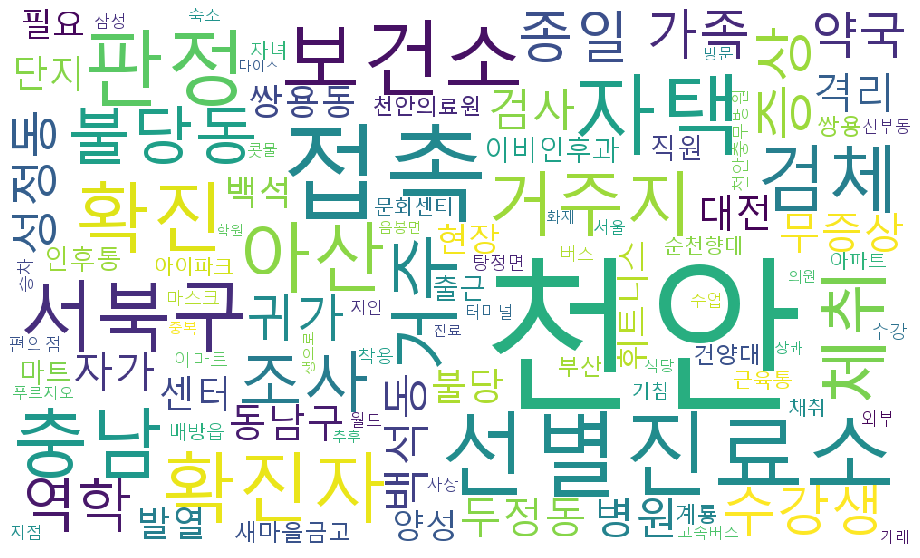

In [330]:
#워드클라우드 그리기

wordcloud=WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',background_color='white',width=1000,height=600).generate_from_frequencies(dict(tags))

fig=plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

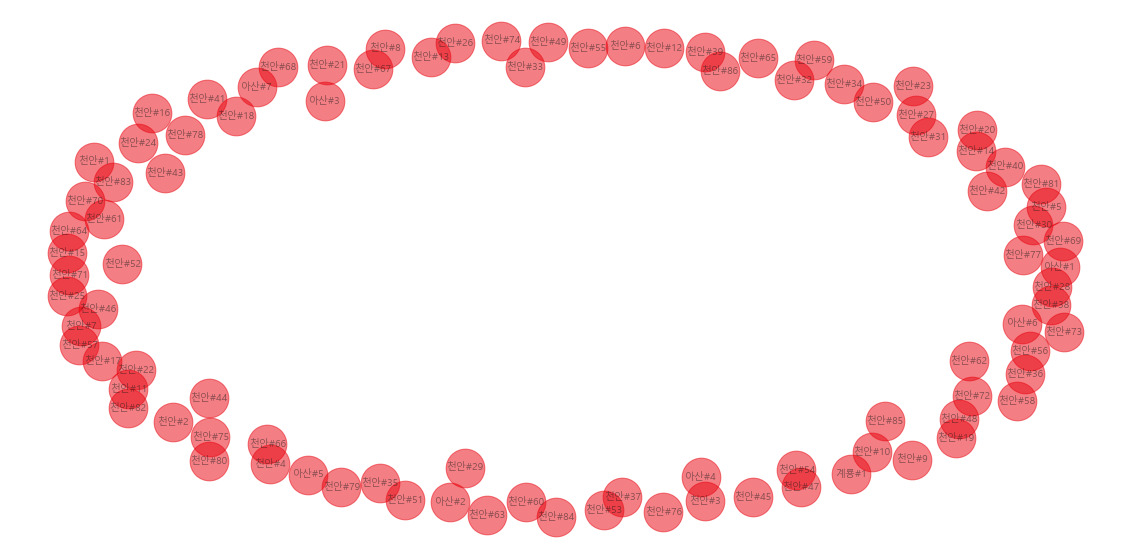

In [227]:
#네트워크 분석으로 연관점 찾기
# http://blog.daum.net/geoscience/1408 참조


#font_path="c:/Windows/Fonts/malgun.ttf"
#font_name=fm.FontProperties(fname=font_path).get_name()
#rc=('font', font_family=font_name)

plt.figure(figsize=(20,10))
plt.axis('off')
G=nx.Graph()
pos=nx.random_layout(G)
#pos=nx.planar_layout(G)
#pos=nx.spring_layout(G)
#G.add_edge(1,2)
G.add_nodes_from(df.소분류)
#G.nodes()
nx.draw_networkx(G, node_size=1500, font_size=10, font_family=font_name, node_color='R',alpha=0.5)#, with_lables=True
plt.show()

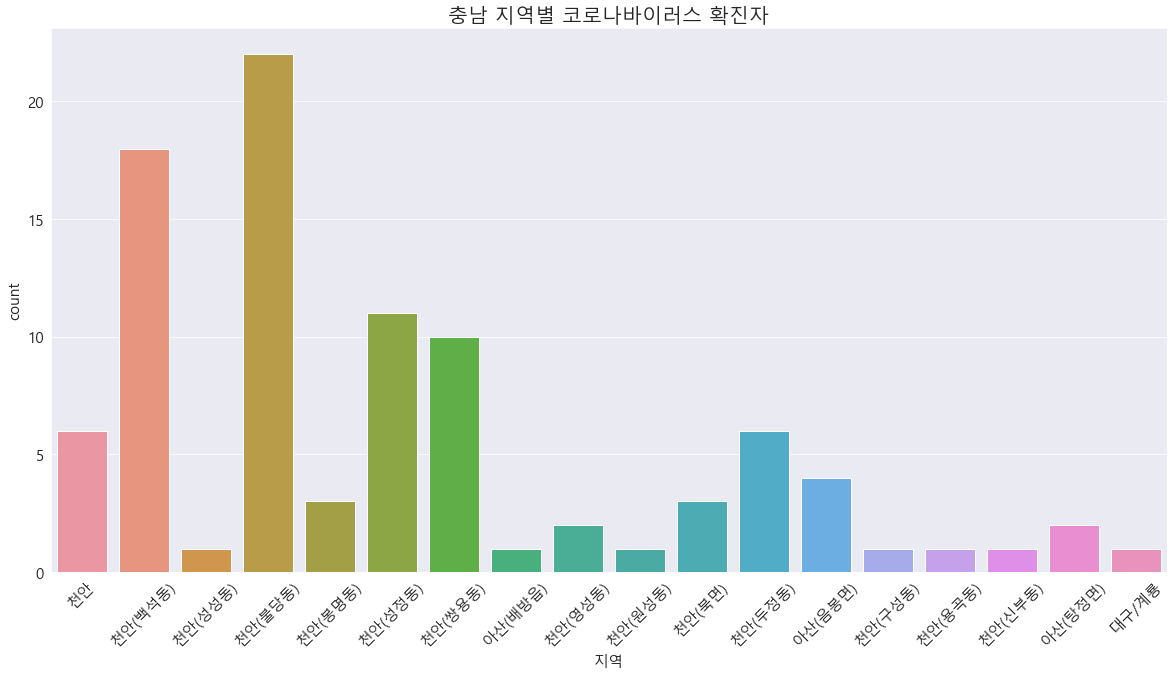

In [228]:
%matplotlib inline

plt.figure(figsize=(20,10))

plt.title('충남 지역별 코로나바이러스 확진자', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
#plt.legend(fontsize=15)
sns.countplot(x=df["지역"],data=df)

In [229]:
# 확진일 시계열 변수로 변환
# 나이 연령대 추가
df['나이']=df['나이'].str.replace('세','')  #1회만 실행 #.astype(int) 
df['나이']=df['나이'].str.replace('대','')   #1회만 실행
df['나이']=df['나이'].astype(int)    #1회만 실행
df['연령대']=(df['나이']//10)*10
#df['연령대'].apply(lambda x:(df['나이']//10)*10)


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 14 columns):
환자         94 non-null object
인적사항       94 non-null object
감염경로       94 non-null object
확진일        94 non-null object
접촉자수       94 non-null object
격리시설       94 non-null object
이동경로       94 non-null object
나이         94 non-null int32
지역         94 non-null object
성별         94 non-null object
대분류        94 non-null object
소분류        94 non-null object
이동경로_편집    94 non-null object
연령대        94 non-null int32
dtypes: int32(2), object(12)
memory usage: 9.7+ KB


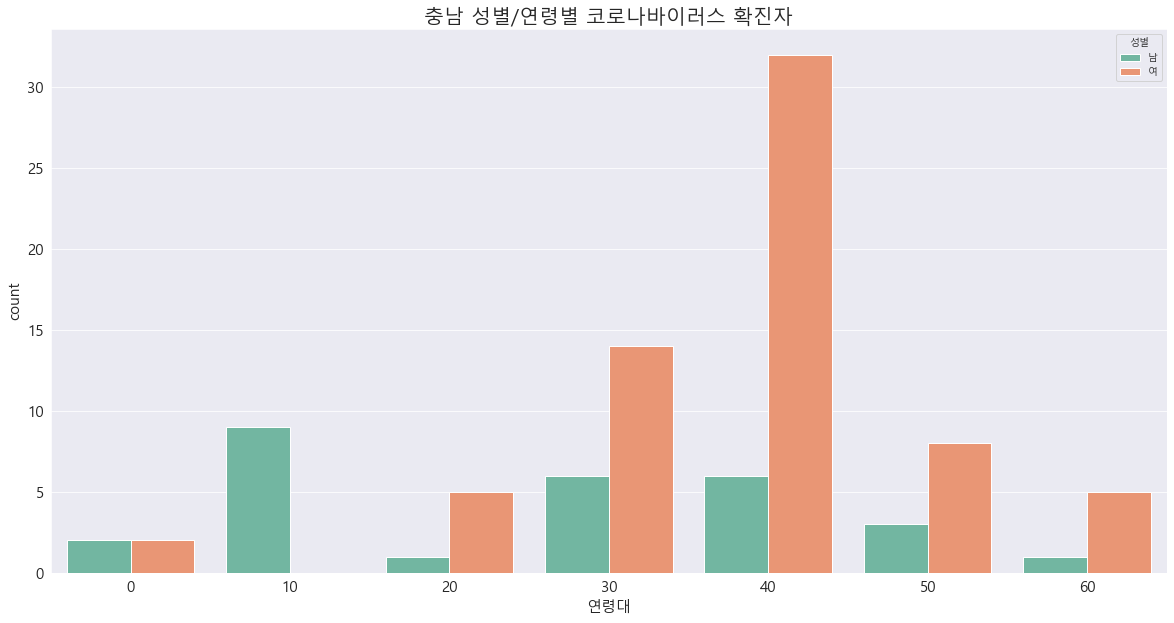

In [231]:
import seaborn as sns
plt.figure(figsize=(20,10))
plt.title('충남 성별/연령별 코로나바이러스 확진자', fontsize=20)
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
sns.set_context(font_scale=15)
sns.set_color_codes(palette='bright')
sns.countplot(x=df["연령대"],hue='성별',data=df, palette='Set2')

In [232]:
splt=df['이동경로_편집'].tolist()

In [350]:
home,way=[],[]
for sp in splt:
    spp=sp.split('\n\n')
    home.append(spp[0])
    way.append(spp[1])
print(way)
    

['\n', '\n', '\n', '\n', '\n', '\n', '(2.27.목) 종 일   천안 자택 거주(백석동)\n(2.28.금) 09:10~09:30 천안 상쾌한이비인후과(두정동)\n(2.28.금) 09:40~  천안 자택 거주\n(2.29.토~3.3.화) 종 일 천안 자택 거주\n(3. 4.수) 18:00   천안 서북구보건소 승차선별진료소\n', '(2.27.목) 종 일   천안 집(서북구 백석동) - 접촉자 2명\n(2.28.금) 09:10∼09:30 천안 집 → 상쾌한 이비인후과(두정동)\n(2.28.금) 09:40∼  천안 집(서북구 백석동)\n(2.29.토∼3.3.금) 종 일 천안 집\n(3. 4.수) 18:00∼ 천안 서북구보건소 승차선별진료소\n', '(2.22.토) 09:00∼09:30 천안 자택 – 접촉자 3명\n(2.22.토) 09:35∼09:37 천안 파티시에(두정동) – 접촉자 1명\n(2.22.토) 09:37∼09:38 천안 김밥천국&스파게티(두정동)\n(2.22.토) 09:40∼09:50 천안 GS칼텍스 스타LPG충전소(성성동)\n(2.22.토) 20:40∼20:51 천안 더달다 과일과게(백석동)\n(2.23.일) 09:10∼09:17 천안 불무메디컬(불당동) – 접촉자 1명\n(2.23.일) 09:19∼09:20 천안 다정약국(불당동)\n(2.24.월) 08:46∼08:19 천안 파리바게트(백석환서점)\n(2.24.월) 09:00∼14:00 천안 새하늘지역아동센터(두정동) – 접촉자 13명\n(2.24.월) 14:16∼14:42 천안 불무메디컬(불당동) – 접촉자 1명\n(2.24.월) 15:45∼15:46 천안 다정약국(불당동)\n(2.24.월) 16:00∼16:14 천안 원마트(백석동)\n(2.25.화) 09:00∼14:00 천안 새하늘 아동센터(두정동)\n(2.26.수) 종 일      천안 자택 거주\n(2.27.목) 종 일      천안 자택 거주\n(2.28.금) 09:08∼09:17 천안 상쾌한 이비인후과(두정

In [351]:
df['증상_거주지']=home
df['경로']=way

In [235]:
df.head(5)

,환자,인적사항,감염경로,확진일,접촉자수,격리시설,이동경로,나이,지역,성별,대분류,소분류,이동경로_편집,연령대,증상_거주지,경로
0,충남#94(천안#86),"천안, 남, 38세",역학조사중,3월 6일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.6.(금) 발열, 상기도 ...",38,천안,남,충남#94,천안#86,"\n- 3.6.(금) 발열, 상기도 감염 증상, 천안충무병원 선별진료소에서 검체 체...",30,"\n- 3.6.(금) 발열, 상기도 감염 증상, 천안충무병원 선별진료소에서 검체 체...",[\n]
1,충남#93(천안#85),"천안, 여, 31세",역학조사중,3월 6일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.6.(금) 기침, 인후통 ...",31,천안,여,충남#93,천안#85,"\n- 3.6.(금) 기침, 인후통 증상, 천안서북구보건소 선별진료소에서 검체 체취...",30,"\n- 3.6.(금) 기침, 인후통 증상, 천안서북구보건소 선별진료소에서 검체 체취...",[\n]
2,충남#92(천안#84),"천안, 남, 69세",역학조사중,3월 6일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.2.(월) 기침, 가래 증...",69,천안,남,충남#92,천안#84,"\n- 3.2.(월) 기침, 가래 증상, 천안의료원 선별진료소에서 검체 체취, 3....",60,"\n- 3.2.(월) 기침, 가래 증상, 천안의료원 선별진료소에서 검체 체취, 3....",[\n]
3,충남#91(천안#83),"천안, 남, 51세",역학조사중,3월 6일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.3.(화) 발열, 인후통,...",51,천안,남,충남#91,천안#83,"\n- 3.3.(화) 발열, 인후통, 근육통 증상, 천안서북구보건소 선별진료소에서 ...",50,"\n- 3.3.(화) 발열, 인후통, 근육통 증상, 천안서북구보건소 선별진료소에서 ...",[\n]
4,충남#90(천안#82),"천안, 남, 52세",역학조사중,3월 5일,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 2.25.(화) 기침 증상, ...",52,천안,남,충남#90,천안#82,"\n- 2.25.(화) 기침 증상, 천안동남구보건소 선별진료소에서 검체 체취, 3....",50,"\n- 2.25.(화) 기침 증상, 천안동남구보건소 선별진료소에서 검체 체취, 3....",[\n]


In [236]:
snr=df['증상_거주지'].tolist()


In [238]:
#확진일 시계열 데이터 변환
df['확진일']=df['확진일'].str.replace('월','-')#.astype('datetime64') #한번만 사용
df['확진일']=df['확진일'].str.replace('일','')   #한번만 사용
df['확진일']=df['확진일'].str.replace(' ','')    #한번만 사용

if '2020-' in df['확진일'].iloc[0]:  
    df['확진일']=df['확진일'].astype('datetime64')
        
else: df['확진일']="2020-"+df['확진일']

df.head()

,환자,인적사항,감염경로,확진일,접촉자수,격리시설,이동경로,나이,지역,성별,대분류,소분류,이동경로_편집,연령대,증상_거주지,경로
0,충남#94(천안#86),"천안, 남, 38세",역학조사중,2020-03-06,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.6.(금) 발열, 상기도 ...",38,천안,남,충남#94,천안#86,"\n- 3.6.(금) 발열, 상기도 감염 증상, 천안충무병원 선별진료소에서 검체 체...",30,"\n- 3.6.(금) 발열, 상기도 감염 증상, 천안충무병원 선별진료소에서 검체 체...",[\n]
1,충남#93(천안#85),"천안, 여, 31세",역학조사중,2020-03-06,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.6.(금) 기침, 인후통 ...",31,천안,여,충남#93,천안#85,"\n- 3.6.(금) 기침, 인후통 증상, 천안서북구보건소 선별진료소에서 검체 체취...",30,"\n- 3.6.(금) 기침, 인후통 증상, 천안서북구보건소 선별진료소에서 검체 체취...",[\n]
2,충남#92(천안#84),"천안, 남, 69세",역학조사중,2020-03-06,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.2.(월) 기침, 가래 증...",69,천안,남,충남#92,천안#84,"\n- 3.2.(월) 기침, 가래 증상, 천안의료원 선별진료소에서 검체 체취, 3....",60,"\n- 3.2.(월) 기침, 가래 증상, 천안의료원 선별진료소에서 검체 체취, 3....",[\n]
3,충남#91(천안#83),"천안, 남, 51세",역학조사중,2020-03-06,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 3.3.(화) 발열, 인후통,...",51,천안,남,충남#91,천안#83,"\n- 3.3.(화) 발열, 인후통, 근육통 증상, 천안서북구보건소 선별진료소에서 ...",50,"\n- 3.3.(화) 발열, 인후통, 근육통 증상, 천안서북구보건소 선별진료소에서 ...",[\n]
4,충남#90(천안#82),"천안, 남, 52세",역학조사중,2020-03-05,역학조사중,확인중,"\n\t\t\t\t\t\t\t\t\t\t\t\t\t- 2.25.(화) 기침 증상, ...",52,천안,남,충남#90,천안#82,"\n- 2.25.(화) 기침 증상, 천안동남구보건소 선별진료소에서 검체 체취, 3....",50,"\n- 2.25.(화) 기침 증상, 천안동남구보건소 선별진료소에서 검체 체취, 3....",[\n]


In [38]:
df.to_csv('천안코로나.csv',encoding='utf-8-sig')

In [242]:
df.info()
df_time=df.groupby(['지역','확진일']).sum()
df_time=df_time.reset_index()
df_time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 17 columns):
환자         94 non-null object
인적사항       94 non-null object
감염경로       94 non-null object
확진일        94 non-null datetime64[ns]
접촉자수       94 non-null object
격리시설       94 non-null object
이동경로       94 non-null object
나이         94 non-null int32
지역         94 non-null object
성별         94 non-null object
대분류        94 non-null object
소분류        94 non-null object
이동경로_편집    94 non-null object
연령대        94 non-null int32
증상_거주지     94 non-null object
경로         94 non-null object
확진자수       94 non-null int64
dtypes: datetime64[ns](1), int32(2), int64(1), object(13)
memory usage: 11.9+ KB


,지역,확진일,나이,연령대,확진자수
0,대구/계룡,2020-02-21,25,20,1
1,아산(배방읍),2020-02-29,35,30,1
2,아산(음봉면),2020-02-28,155,140,4
3,아산(탕정면),2020-02-26,87,80,2
4,천안,2020-03-05,77,70,2
5,천안,2020-03-06,189,170,4
6,천안(구성동),2020-02-28,38,30,1
7,천안(두정동),2020-02-25,50,50,1
8,천안(두정동),2020-02-27,40,40,1
9,천안(두정동),2020-02-28,191,170,4


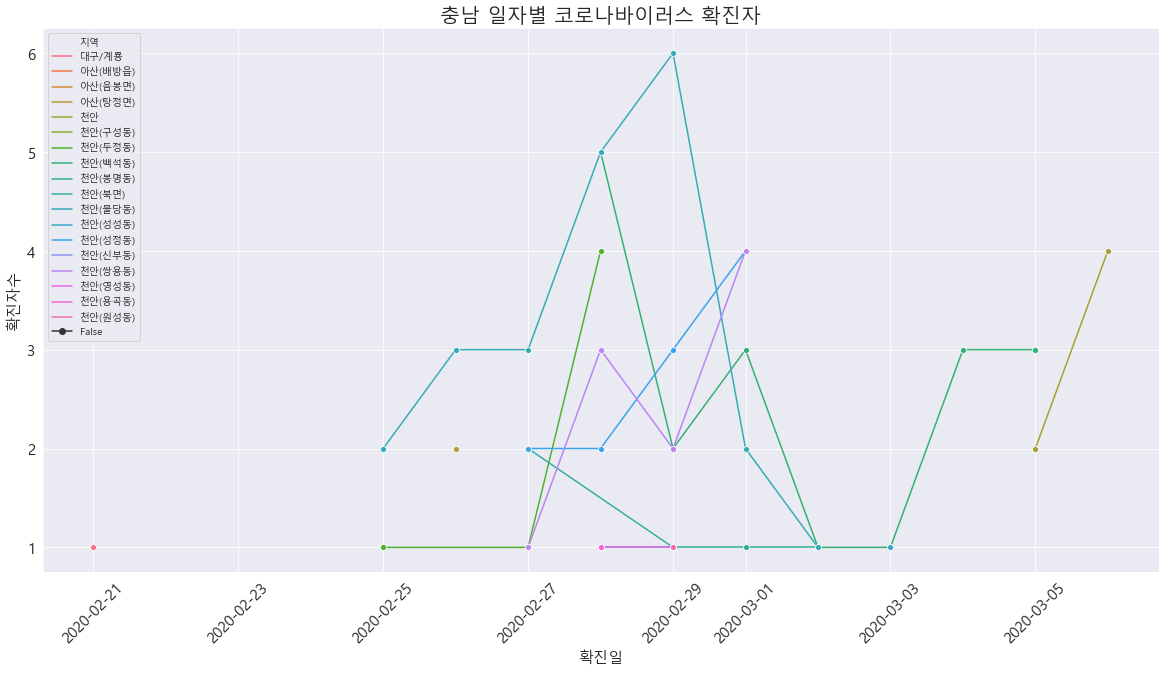

In [243]:
df['확진자수']=1

%matplotlib inline

plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(20,10))
plt.title('충남 일자별 코로나바이러스 확진자', fontsize=20)
plt.xticks(fontsize=15,rotation=45)
#plt.xlim('2020-02-20','2020-03-15')
plt.yticks(fontsize=15)
plt.xlabel('x',size=15)
plt.ylabel('y',size=15)
#sns.set_context(font_scale=15)
sns.set_color_codes(palette='bright')

filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', '+', 'X','.','1','_')

sns.lineplot(x='확진일',y='확진자수',hue='지역',style=False, dashes=False, markers=True, data=df_time)#,style='지역'
plt.show()

In [335]:
#증상 워드클라우드 분석

text=''.join(df['증상_거주지'].tolist())

twitter=Twitter()
twitter.add_dictionary(['순천향대학천안병원','현대아트빌라','현대로얄빌라','다가구주택','21세기병원','서울대정병원','파크밸리동일하이빌','대동다숲','성정동','두정동','지웰시티푸르지오','지웰푸르지오','지웰더샾','백석더샾','호반써밋플레잇센터시티','상아빌라','린스트라우스2차','벽산블루밍1차','호반베르디움센트로포레','태헌장미2차아파트','펜타폴리스','쌍용마을','용암마을','성성동','영성동','원성동','씨티자이','확진자','휘트니스','도보이동','쌍용동','동일하이빌','선별진료소','천안충무병원','하나로마트','자차이동','인후통','롯데마트','삼성라온내과','성정동','M정밀'], 'Noun') # 사전에 단어추가


nouns=twitter.nouns(text)

# 길이 하나 이상인 형태소만 리스트 담기
nouns=[n for n in nouns if len(n)>1]


# 불용어 처리
stop_words=''
stop_words=stop_words.split(' ')

filter_nouns=[n for n in nouns if n not in stop_words]        
        
# 명사만 빈도수 추출(상위 100개)
count=Counter(filter_nouns)
tags=count.most_common(100)

print(tags)

[('천안', 135), ('확진', 94), ('판정', 94), ('검체', 93), ('선별진료소', 92), ('확진자', 86), ('거주지', 85), ('체취', 82), ('충남', 82), ('보건소', 69), ('증상', 59), ('서북구', 51), ('수강생', 41), ('조사', 37), ('가족', 37), ('역학', 36), ('무증상', 32), ('접촉', 26), ('발열', 25), ('불당동', 23), ('아산', 22), ('인후통', 17), ('동남구', 15), ('근육통', 13), ('백석동', 13), ('기침', 12), ('채취', 11), ('성정동', 11), ('단지', 10), ('천안의료원', 9), ('아이파크', 9), ('외부', 9), ('백석', 8), ('콧물', 8), ('천안충무병원', 7), ('가래', 7), ('쌍용동', 7), ('푸르지오', 6), ('동일하이빌', 6), ('순천향대', 6), ('두통', 6), ('오한', 5), ('파크', 5), ('밸리', 5), ('대동다숲', 5), ('단독주택', 5), ('두정동', 5), ('기타', 5), ('백석더샾', 4), ('대타', 4), ('강사', 4), ('강습', 4), ('로부터', 4), ('수업', 4), ('쌍용', 4), ('일반', 4), ('발병', 4), ('병원', 4), ('승차', 3), ('주택', 3), ('봉명동', 3), ('북면', 3), ('상아빌라', 3), ('단국대병원', 2), ('상가', 2), ('근무', 2), ('감기', 2), ('호반', 2), ('파크밸리동일하이빌', 2), ('학교', 2), ('안병원', 2), ('빌라', 2), ('지웰시티푸르지오', 2), ('영성동', 2), ('펜타폴리스', 2), ('파트', 2), ('태헌장미2차아파트', 2), ('아파트', 2), ('휘트니스', 2), ('센터', 2), ('수강', 2), ('린스

In [328]:
q=0
for t in df['증상_거주지'].tolist():
    if '센터' in t:
        #q=1+q
        print(t)
print(q)


- 2.27.(목) 무증상, 2.27.(목) 천안서북구보건소 선별진료소에서 검체 체취, 2.28.(금) 확진 판정
- 거주지 : 태헌장미2차아파트, 월드JNK휘트니스센터 수강, 역학조사 中

- 2.27.(목) 발열, 기침 증상, 2.27.(목) 천안서북구보건소 선별진료소에서 검체 체취, 2.28.(금) 확진 판정
- 거주지 : 불당동 호반써밋플레잇센터시티, 충남#11번(천안#8번) 확진자의 가족, 역학조사 中

- 2.25.(화) 두통, 오한 증상, 2.26.(수) 천안서부구보건소에서 검체 체취, 2.27.(목) 확진 판정
- 거주지 : 불당동 아이파크, 충남#8번(천안#5번) 확진자의 수강생(2.20.목 불당동 아이파크 휘트니스센터 줌바댄스 수강)
0


In [382]:
#증상 워드클라우드 분석

text1=''.join(df['경로'].tolist())

twitter=Twitter()
twitter.add_dictionary(['서비스센터','문화센터','휘트니스센터','상쾌한이비인후과','건양대병원','으로','삼성화재','수강생','코닝정밀소재','고속버스터미널','천안터미널','선영새마을금고','접촉자','순천향대학천안병원','현대아트빌라','현대로얄빌라','다가구주택','21세기병원','서울대정병원','파크밸리동일하이빌','대동다숲','성정동','두정동','지웰시티푸르지오','지웰푸르지오','지웰더샾','백석더샾','호반써밋플레잇센터시티','상아빌라','린스트라우스2차','벽산블루밍1차','호반베르디움센트로포레','태헌장미2차아파트','펜타폴리스','쌍용마을','용암마을','성성동','영성동','원성동','씨티자이','확진자','휘트니스','도보이동','쌍용동','동일하이빌','선별진료소','천안충무병원','하나로마트','자차이동','인후통','롯데마트','삼성라온내과','성정동','M정밀'], 'Noun') # 사전에 단어추가
              
               
nouns=twitter.nouns(text1)

# 길이 하나 이상인 형태소만 리스트 담기
nouns=[n for n in nouns if len(n)>1]


# 불용어 처리
stop_words='으로 생으로 경천'
stop_words=stop_words.split(' ')

filter_nouns=[n for n in nouns if n not in stop_words]        
        
# 명사만 빈도수 추출(상위 100개)
count=Counter(filter_nouns)
tags=count.most_common(100)

print(tags)

[('천안', 611), ('접촉자', 170), ('자택', 134), ('거주', 87), ('아산', 78), ('선별진료소', 59), ('종일', 56), ('서북구', 54), ('보건소', 53), ('불당동', 48), ('귀가', 45), ('약국', 41), ('조사', 41), ('검사', 36), ('성정동', 32), ('자가', 31), ('격리', 31), ('판정', 30), ('백석동', 27), ('두정동', 27), ('대전', 27), ('불당', 25), ('충남', 24), ('양성', 23), ('현장', 22), ('역학', 22), ('필요', 22), ('쌍용동', 19), ('출근', 18), ('마트', 17), ('직원', 17), ('백석', 16), ('단지', 16), ('확진자', 16), ('병원', 16), ('부산', 16), ('이비인후과', 15), ('계룡', 15), ('건양대병원', 14), ('동남구', 13), ('문화센터', 13), ('가족', 13), ('자녀', 12), ('쌍용', 12), ('배방읍', 12), ('새마을금고', 12), ('수강생', 12), ('센터', 11), ('편의점', 11), ('이마트', 11), ('휘트니스', 11), ('마스크', 11), ('착용', 11), ('아파트', 10), ('버스', 10), ('서울', 9), ('지인', 9), ('사장', 9), ('수강', 9), ('지점', 9), ('휘트니스센터', 9), ('숙소', 9), ('탕정면', 8), ('신부동', 8), ('방문', 8), ('식당', 8), ('월드', 8), ('승차', 7), ('의원', 7), ('순천향대', 7), ('확진', 7), ('삼성화재', 7), ('추후', 7), ('음봉면', 7), ('중복', 7), ('고속버스터미널', 6), ('학원', 6), ('다이소', 6), ('진료', 6), ('정점', 6), ('천안의료원', 6)

In [378]:
q=0
for t in df['경로'].tolist():
    if '센터' in t:
        #q=1+q
        print(t)
print(q)

(2.22.토) 09:00∼09:30 천안 자택 – 접촉자 3명
(2.22.토) 09:35∼09:37 천안 파티시에(두정동) – 접촉자 1명
(2.22.토) 09:37∼09:38 천안 김밥천국&스파게티(두정동)
(2.22.토) 09:40∼09:50 천안 GS칼텍스 스타LPG충전소(성성동)
(2.22.토) 20:40∼20:51 천안 더달다 과일과게(백석동)
(2.23.일) 09:10∼09:17 천안 불무메디컬(불당동) – 접촉자 1명
(2.23.일) 09:19∼09:20 천안 다정약국(불당동)
(2.24.월) 08:46∼08:19 천안 파리바게트(백석환서점)
(2.24.월) 09:00∼14:00 천안 새하늘지역아동센터(두정동) – 접촉자 13명
(2.24.월) 14:16∼14:42 천안 불무메디컬(불당동) – 접촉자 1명
(2.24.월) 15:45∼15:46 천안 다정약국(불당동)
(2.24.월) 16:00∼16:14 천안 원마트(백석동)
(2.25.화) 09:00∼14:00 천안 새하늘 아동센터(두정동)
(2.26.수) 종 일      천안 자택 거주
(2.27.목) 종 일      천안 자택 거주
(2.28.금) 09:08∼09:17 천안 상쾌한 이비인후과(두정동)
(2.28.금) 09:18∼09:22 천안 맘편한 약국(두정동)
(2.28.금) 09:25∼09:29 천안 빠응(두정동)
(2.29.토) 11:05∼11:07 천안 노브랜드(백석점)
(3. 1.일) 11:21∼11:24 천안 노브랜드(백석점)
(3. 2.월) 종 일      천안 자택 거주
(3. 3.화) 종 일      천안 자택 거주
(3. 4.수) 14:10∼14:19 천안 피자마루(백석점)
(3. 4.수) 18:00∼   천안 서북구보건소 승차선별진료소 

(2.23.일) 종일  천안 자택 거주
(2.24.월) 08:55~12:00 천안 백석동 우리동네체육관(요가수업) - 접촉자 14명(체육관 28일부터 휴관)
(2.25.화~2.28.금) 종일 천안 자택 거주
(2.29.토) 09:01~0